In [1]:
import preprocess as pp
import configs
import persister
import relation
import lda
import vis
import evaluate
from utils import *

from collections import Counter
from pprint import pprint
from functools import reduce

import re
import numpy as np
from nltk.tree import Tree
from nltk import word_tokenize,sent_tokenize

not use stanford CoreNLP client!


In [2]:
# is_news = 1

# l = 7
# t = 4
# m = "c_v"
# i = 200
# min_df = 1

is_news = 0
l = 6
t = 14
m = "c_v"
i = 200
min_df = 1

size = 100

# load
if is_news:
    _raw = persister.load_json(configs.RAWNEWS)
    parse = persister.read_parse()
    _input = persister.read_input(configs.NEWSINPUT)
    model_name = configs.NEWSMODEL.format(l, t, m, i, min_df)
    terms, doc_topic, topic_word = persister.read_lda(configs.NEWSLDA.format(model_name))
    model = persister.load_model(model_name)
    vec = persister.load_model(configs.NEWSVEC.format(min_df))
    w2vmodel = persister.load_wv(configs.NEWSWV.format(size))
    print("load news")
else:
    _raw = persister.load_json(configs.RAWABSTRACT)
    _input = persister.read_input(configs.ABSTRACTINPUT)
    model_name = configs.ABSTRACTMODEL.format(l, t, m, i, min_df)
    terms, doc_topic, topic_word = persister.read_lda(configs.ABSTRACTLDA.format(model_name))
    parse = persister.read_parse(configs.ABSTRACTPARSE)
    model = persister.load_model(model_name)
    vec = persister.load_model(configs.ABSVEC.format(min_df))
    w2vmodel = persister.load_wv(configs.ABSWV.format(size))
    print("load abs")
tf = vec.fit_transform(_input)
top_terms, top_docs = lda.get_topics(topic_word, terms, doc_topic,20)
word_values = []
for i in top_terms:
    tmp = []
    for j in i:
        tmp.append((terms[j[0]], j[1]))
#         tmp.append(terms[j[0]])
    word_values.append(tmp)
df_top_words, df_top_docs = lda.pd_topics_vis(word_values, top_docs)

load abs


In [3]:
len(terms)

9933

In [4]:
distr = lda.get_dominant_topic(doc_topic)
print("docs distribution:",dict(Counter(distr)))

docs distribution: {3: 395, 12: 766, 13: 5, 0: 27, 11: 83, 6: 1176, 4: 140, 7: 1, 1: 2, 10: 1}


In [5]:
print("top terms info:")
df_top_words

top terms info:


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,"(patient, 221.18)","(health, 156.45)","(disease, 154.5)","(medical, 143.69)","(clinical, 137.79)","(gene, 113.72)","(treatment, 106.83)","(datum, 94.07)","(diagnosis, 83.0)","(care, 68.83)","(study, 63.52)","(functional, 62.15)","(tourist, 57.71)","(record, 54.26)","(tourism, 54.06)","(function, 50.48)","(association, 48.94)","(conclusion, 46.28)","(result, 44.88)","(prediction, 44.08)"
Topic 1,"(news, 259.54)","(style, 86.19)","(divergence, 63.1)","(lm, 50.88)","(article, 37.19)","(list, 36.26)","(artifact, 27.07)","(software, 26.52)","(setting, 26.22)","(stop, 25.47)","(story, 25.25)","(kl, 22.62)","(kullback, 21.37)","(density, 21.02)","(combinatorial, 20.41)","(leibler, 20.37)","(client, 20.19)","(player, 18.96)","(idea, 16.53)","(headline, 16.33)"
Topic 2,"(child, 19.85)","(hyperspectral, 11.69)","(isoform, 9.79)","(homogenous, 7.93)","(tot, 7.11)","(parent, 7.01)","(negotiation, 6.85)","(lv, 6.78)","(movrec, 6.69)","(yor, 6.67)","(pitman, 6.67)","(geoclef, 6.22)","(lane, 5.93)","(ftm, 5.9)","(superpixel, 5.87)","(ldlm, 5.12)","(ldalr, 5.06)","(vertical, 5.03)","(blau, 4.99)","(cbe, 4.86)"
Topic 3,"(use, 774.45)","(datum, 691.96)","(topic, 635.56)","(event, 447.82)","(activity, 416.09)","(analysis, 402.85)","(time, 393.15)","(study, 386.16)","(identify, 340.06)","(latent, 334.16)","(social, 330.52)","(pattern, 316.37)","(allocation, 311.09)","(dirichlet, 293.64)","(approach, 289.6)","(analyze, 275.95)","(change, 271.08)","(software, 241.73)","(network, 237.56)","(community, 237.21)"
Topic 4,"(image, 910.26)","(feature, 421.58)","(object, 376.84)","(propose, 348.52)","(visual, 296.13)","(method, 295.57)","(video, 294.0)","(scene, 289.52)","(level, 214.63)","(human, 195.09)","(result, 176.11)","(use, 171.6)","(spatial, 170.43)","(annotation, 167.65)","(model, 167.43)","(recognition, 166.41)","(classification, 163.3)","(semantic, 151.41)","(latent, 142.66)","(region, 141.64)"
Topic 5,"(author, 92.33)","(song, 79.19)","(genre, 39.85)","(indexing, 37.56)","(write, 34.77)","(lsi, 27.65)","(pn, 27.24)","(digital, 23.5)","(oov, 20.37)","(indonesian, 19.81)","(lyric, 17.49)","(music, 16.78)","(musical, 16.56)","(abbreviation, 15.75)","(broadcast, 14.92)","(commonness, 14.53)","(writer, 13.97)","(intrinsic, 13.41)","(authorship, 13.14)","(forensic, 12.59)"
Topic 6,"(model, 4572.2)","(topic, 3802.4)","(latent, 1869.53)","(document, 1816.82)","(use, 1707.65)","(lda, 1596.94)","(method, 1559.28)","(word, 1384.37)","(dirichlet, 1360.57)","(propose, 1312.33)","(allocation, 1144.06)","(text, 1130.34)","(datum, 1093.51)","(algorithm, 958.69)","(result, 891.73)","(approach, 873.17)","(base, 804.38)","(paper, 791.13)","(feature, 742.09)","(distribution, 661.89)"
Topic 7,"(question, 166.56)","(sleep, 24.96)","(recipient, 21.27)","(complaint, 19.62)","(thread, 18.53)","(answerer, 18.36)","(financial, 17.69)","(cyber, 16.29)","(people, 16.03)","(adr, 15.48)","(concurrency, 14.81)","(adverse, 14.53)","(profiling, 13.78)","(monetary, 13.64)","(related, 13.16)","(narrative, 13.02)","(epoch, 12.84)","(cqa, 10.49)","(metaphor, 9.63)","(id, 9.55)"
Topic 8,"(music, 39.4)","(sms, 12.77)","(richer, 11.87)","(fluid, 10.13)","(surname, 10.05)","(forename, 10.05)","(medlda, 10.02)","(landslide, 8.72)","(thai, 8.69)","(vmf, 8.43)","(uv, 7.84)","(manga, 7.74)","(boa, 7.15)","(chara, 6.65)","(yuru, 6.65)","(suffice, 5.78)","(sp, 5.1)","(cartographer, 5.05)","(lay, 4.97)","(compatible, 4.89)"
Topic 9,"(permission, 25.17)","(quran, 13.82)","(foreground, 10.77)","(holy, 9.76)","(setup, 8.92)","(aircraft, 8.0)","(syllabus, 7.25)","(microbial, 6.95)","(privilege, 5.86)","(securitas, 5.78)","(iexpand, 5.13)","(configure, 5.01)","(degrader, 4.99)","(diversionary, 4.93)","(oa, 4.04)","(packet, 4.0)","(mcluster, 3.96)","(assemble, 3.95)","(skewness, 3.94)","(pcfg, 3.13)"


In [6]:
print("top docs info:")
df_top_docs

top docs info:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Topic 0,"(562, 0.636)","(377, 0.593)","(61, 0.571)","(1350, 0.553)","(263, 0.516)","(894, 0.49)","(722, 0.481)","(179, 0.477)","(344, 0.473)","(1855, 0.465)","(2386, 0.447)","(1897, 0.405)","(1764, 0.4)","(1069, 0.388)","(1533, 0.387)","(2304, 0.385)","(1566, 0.382)","(415, 0.38)","(5, 0.378)","(1037, 0.371)"
Topic 1,"(716, 0.367)","(142, 0.329)","(123, 0.315)","(1312, 0.287)","(87, 0.286)","(48, 0.252)","(1378, 0.236)","(1239, 0.227)","(989, 0.227)","(465, 0.22)","(971, 0.209)","(133, 0.195)","(1274, 0.193)","(9, 0.186)","(357, 0.183)","(1447, 0.178)","(234, 0.175)","(866, 0.173)","(355, 0.171)","(406, 0.17)"
Topic 2,"(47, 0.22)","(854, 0.152)","(2526, 0.15)","(796, 0.15)","(142, 0.147)","(1178, 0.135)","(926, 0.13)","(2057, 0.12)","(920, 0.116)","(1266, 0.116)","(1414, 0.112)","(994, 0.099)","(1785, 0.099)","(1638, 0.098)","(1449, 0.098)","(1440, 0.098)","(1242, 0.097)","(2121, 0.093)","(1406, 0.091)","(2188, 0.091)"
Topic 3,"(580, 0.964)","(483, 0.943)","(953, 0.942)","(127, 0.937)","(171, 0.909)","(1154, 0.894)","(150, 0.892)","(68, 0.879)","(909, 0.856)","(994, 0.846)","(650, 0.842)","(1046, 0.832)","(214, 0.821)","(1594, 0.819)","(704, 0.81)","(122, 0.807)","(229, 0.807)","(294, 0.805)","(1193, 0.803)","(543, 0.796)"
Topic 4,"(1222, 0.785)","(416, 0.781)","(1223, 0.779)","(1550, 0.775)","(745, 0.764)","(1811, 0.746)","(2520, 0.737)","(695, 0.732)","(662, 0.726)","(291, 0.726)","(1111, 0.725)","(166, 0.718)","(399, 0.716)","(2339, 0.716)","(1410, 0.71)","(2580, 0.706)","(1020, 0.704)","(393, 0.699)","(2026, 0.698)","(1694, 0.692)"
Topic 5,"(1570, 0.376)","(158, 0.35)","(477, 0.339)","(1117, 0.323)","(1606, 0.311)","(1874, 0.247)","(757, 0.243)","(737, 0.215)","(30, 0.214)","(2004, 0.212)","(1306, 0.207)","(778, 0.201)","(126, 0.199)","(1167, 0.18)","(2219, 0.172)","(2433, 0.165)","(1175, 0.164)","(581, 0.153)","(2118, 0.151)","(2325, 0.15)"
Topic 6,"(809, 0.992)","(535, 0.992)","(98, 0.991)","(742, 0.991)","(438, 0.991)","(1901, 0.991)","(173, 0.99)","(2240, 0.99)","(95, 0.99)","(481, 0.989)","(480, 0.989)","(2365, 0.989)","(1157, 0.988)","(991, 0.987)","(2237, 0.987)","(2593, 0.987)","(2579, 0.987)","(332, 0.987)","(2141, 0.986)","(2550, 0.986)"
Topic 7,"(81, 0.439)","(75, 0.327)","(996, 0.304)","(1928, 0.23)","(42, 0.224)","(935, 0.206)","(1273, 0.201)","(830, 0.199)","(2453, 0.195)","(413, 0.184)","(453, 0.176)","(802, 0.168)","(882, 0.158)","(1243, 0.146)","(1761, 0.145)","(1567, 0.142)","(2114, 0.142)","(2040, 0.139)","(1272, 0.139)","(1548, 0.134)"
Topic 8,"(1319, 0.225)","(872, 0.199)","(1024, 0.177)","(1958, 0.176)","(124, 0.156)","(1625, 0.155)","(711, 0.152)","(1278, 0.129)","(2195, 0.122)","(856, 0.121)","(1287, 0.116)","(1450, 0.112)","(2233, 0.107)","(1199, 0.105)","(1206, 0.103)","(1543, 0.093)","(2420, 0.091)","(1925, 0.085)","(2194, 0.082)","(981, 0.081)"
Topic 9,"(1309, 0.196)","(1079, 0.196)","(1400, 0.189)","(1813, 0.159)","(1310, 0.146)","(1744, 0.141)","(2516, 0.129)","(1822, 0.122)","(1762, 0.121)","(2158, 0.115)","(1415, 0.113)","(1133, 0.11)","(1868, 0.105)","(1479, 0.101)","(2440, 0.098)","(2422, 0.094)","(1542, 0.091)","(897, 0.076)","(1719, 0.071)","(2199, 0.068)"


In [7]:
# vis.pyLDA(topic_word, doc_topic, [len(s) for s in [word_tokenize(corp) for corp in _input]], vec.get_feature_names(), np.array(sum(tf).todense())[0])

In [8]:
t_idx = 1
for top_doc in top_docs[t_idx]:
    _idx = top_doc[0]
    if type(parse[_idx]) is str:
        print(_idx, "parse", "err")
        continue
    sents = relation.convert_parse2lemma_sents(parse[_idx])
    sort_idxs, importance, counts = relation.extract_important_sents(sents, [terms[x[0]] for x in top_terms[t_idx]], [x[1] for x in top_terms[t_idx]])
    for i in sort_idxs:
        if importance[i]>0:
            print(round(importance[i], 2), counts[i], _idx, i)
            sent_tokens = parse[_idx]["sentences"][i]["tokens"]
            sent_deps = parse[_idx]["sentences"][i]["enhancedPlusPlusDependencies"]
            print(" ".join([s["lemma"] for s in sent_tokens]))
            sents = sent_tokenize(_raw[_idx])
            if len(sents) > i:
                print(sents[i])
            else:
                print("sent token differ")
            triples = relation.extract_triples_from_sent(sent_deps, sent_tokens, True)
            for triple in triples:
                if None in triple:
                    print(triple)
                    continue
                s = [sent_tokens[i]["originalText"] for i in triple[0]]
                p = [sent_tokens[i]["originalText"] for i in triple[1]]
                o = [sent_tokens[i]["originalText"] for i in triple[2]]
                print("{}-{}-{}".format(s,p,o))
            print("="*40)

0.33 2 716 2
representational state transfer style be become a de facto standard adopt by software organization to build they web application .
REpresentational State Transfer (REST) style is becoming a de facto standard adopted by software organizations to build their Web applications.
[(0, 1, 2, 3), (5,), None]
[(0, 1, 2, 3), (9,), None]
0.04 1 716 1
understandability and reusability be two important characteristic of software quality .
Understandability and reusability are two important characteristics of software quality.
['Understandability', 'and', 'reusability']-['are']-['important', 'characteristics', 'of', 'quality']
0.04 1 716 0
Identifier lexicon may have a direct impact on software understandability and reusability and , thus , on the quality of the final software product .
Identifier lexicon may have a direct impact on software understandability and reusability and, thus, on the quality of the final software product.
['Identifier', 'lexicon']-['have']-['direct', 'impact', 

0.04 1 465 2
specifically , we first propose Relational Rules , a novel representation scheme for cooperative game with overlap coalition , which encode the aforementioned relation , and which extend the well-known MC net representation to this setting .
Specifically, we first propose Relational Rules, a novel representation scheme for cooperative games with overlapping coalitions, which encodes the aforementioned relations, and which extends the well-known MC nets representation to this setting.
['we']-['propose']-['Relational', 'Rules']
0.0 1 971 7
practically , we demonstrate how we research can be use to automatically identify promising idea and recommend word to user on the fly to help they improve they idea .
Practically, we demonstrate how our research can be used to automatically identify promising ideas and recommend words to users on the fly to help them improve their ideas.
[(2,), (3,), None]
[(6,), (9,), None]
['research']-['identify']-['promising', 'ideas']
['research']-['

0.02 1 9 6
we result highlight potential area with high density of affected individual and infrastructure damage throughout the temporal progression of the disaster .
Our results highlight potential areas with high density of affected individuals and infrastructure damage throughout the temporal progression of the disaster.
['results']-['highlight']-['potential', 'areas', 'with', 'density']
0.09 1 357 3
by utilize latent dirichlet allocation as a generative probabilistic topic model , we analyse a unique dataset consist of 46,582 full-text article publish in the last 26 year in 21 specialize scientific fishery journal .
By utilizing latent Dirichlet allocation as a generative probabilistic topic model, we analyse a unique dataset consisting of 46,582 full-text articles published in the last 26 years in 21 specialized scientific fisheries journals.
['we']-['analyse']-['unique', 'dataset']
['we']-['utilizing']-['latent', 'Dirichlet', 'allocation']
['we']-['utilizing']-['as', 'generative'

In [9]:
extended = relation.extend_lda_results(parse, _input, top_terms, top_docs, terms, "lemma", top_n=-1, score_method="tf")
print([len(t) for t in extended])
for triple in extended[t_idx]:
    print(round(triple[1],4),"{}-[{}]-{}".format(" ".join(triple[0][0])," ".join(triple[0][1])," ".join(triple[0][2])))

[145, 102, 49, 179, 199, 125, 161, 109, 63, 66, 112, 134, 238, 172]
113 topic modeling-[understand]-news report
101 topic modeling in particular-[discover]-from software artifact
100 topic modeling in particular-[discover]-meaningful information
99 latent Dirichlet Allocations-[train]-topic model
93 we-[utilize]-as generative probabilistic topic model
87 stop word list-[result in]-higher performance of model
81 topic modeling-[offer]-insight
77 different outlet-[emphasize]-different topic
70 we-[propose]-automatic stop word generation approach for model
65 topic-[relate to]-% of item
64 we-[measure]-topic coherence
64 core criterion for use-[have]-problem list
61 list datum-[use]-Latent-Dirichlet Allocation
59 model-[yield]-in performance to model
55 second task-[identify]-word in headline
53 we-[find]-news report about ths over period and report
51 model-[outperform]-for good headline task
49 latent Dirichlet Allocations-[predict]-potential practice setting
48 model-[outperform]-other

In [10]:
ws = 30
measure = "c_uci"
old = lda.get_coherence(tf, terms, topic_word, _input, measure, top_n=10, window_size=ws)
extended = [e[:10] for e in extended]
new = evaluate.evaluate_triples_by_coherence(extended,vec,terms,topic_word,_input,top_docs,measure, window_size=ws)
print(old, new, sep="\n")
print(np.mean(old), np.mean(new))

[1.3899127704536671, -6.248817377120519, -10.781978515440338, 0.03514910926328956, 0.5566863601311559, -7.668307907231789, 0.18866172486884708, -9.095985942923063, -11.282420612942161, -10.392978844989257, -10.51093504380355, 0.2787755623065728, 0.03957595908190311, -1.7784915107437775]
[-0.9587584068791867, -0.31966102657360557, -2.6774010066203577, -1.2356048186584927, -0.036457446795983034, -1.2679693685869782, -0.2812313254872536, -2.583357686847183, -1.3043511779882195, -1.3365468710136967, -0.4236847044931436, 0.1955095215017264, 0.1329436156130538, -1.0581555537294218]
-4.66222530493493 -0.9396233040399103


In [11]:
ps = relation.get_phrases_by_pattern(parse)
sorted(dict(Counter([" ".join(x) for x in ps])).items(), key=lambda x:x[1], reverse=True)

func get_phrases_by_pattern exec time: 1.4586296081542969


[('latent Dirichlet allocation', 705),
 ('topic model', 646),
 ('experimental result', 431),
 ('topic modeling', 320),
 ('latent topic', 202),
 ('latent Dirichlet Allocation', 199),
 ('LDA model', 178),
 ('latent Dirichlet allocation model', 155),
 ('short text', 124),
 ('sentiment analysis', 103),
 ('social media', 99),
 ('topic distribution', 92),
 ('social network', 89),
 ('recent year', 86),
 ('Dirichlet allocation', 86),
 ('large number', 82),
 ('text mining', 80),
 ('latent Dirichlet Allocation model', 78),
 ('Gibbs sampling', 74),
 ('case study', 73),
 ('dirichlet allocation', 68),
 ('probabilistic topic model', 68),
 ('information retrieval', 65),
 ('previous work', 65),
 ('large amount', 61),
 ('natural language processing', 60),
 ('visual word', 59),
 ('latent Dirichlet allocation topic model', 57),
 ('novel approach', 57),
 ('extensive experiment', 54),
 ('better performance', 54),
 ('big datum', 53),
 ('machine learning', 52),
 ('new method', 52),
 ('online review', 51),
 (

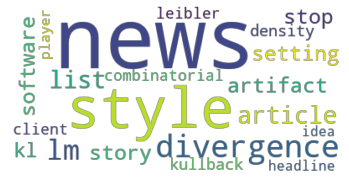

In [12]:
vis.draw_word_cloud("", {terms[k]:v for k,v in top_terms[t_idx]}, False)